## Neural Networks

**Student:** Guillem Amat (ga98), Sebastian Soriano ()

### Importing Packages

In [118]:
# Usual packages
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import numpy as np
import os

In [119]:
# Torch packages
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F

<br>

### Q1: Multi-Layer Neural Network

Build a multi-layer neural network using PyTorch. Use it to solve the XOR classification problem generated by gen_xor.py. Visualize the decision surface using matplotlib, with the training data overlaid as in Tensorflow Playground.

**XOR Data**

In [120]:
def gen_xor():
    """Generate XOR data."""
    nobs_per = 50

    X = np.vstack((
        np.random.randn(nobs_per, 2) * 0.25 + [[0, 0]],
        np.random.randn(nobs_per, 2) * 0.25 + [[1, 1]],
        np.random.randn(nobs_per, 2) * 0.25 + [[0, 1]],
        np.random.randn(nobs_per, 2) * 0.25 + [[1, 0]],
    ))
    Y = np.hstack((
        np.zeros((2 * nobs_per,)),
        np.ones((2 * nobs_per,)),
    ))
    return X, Y

In [121]:
X, y = gen_xor()

Text(0.5, 1.0, 'XOR Distributed Data')

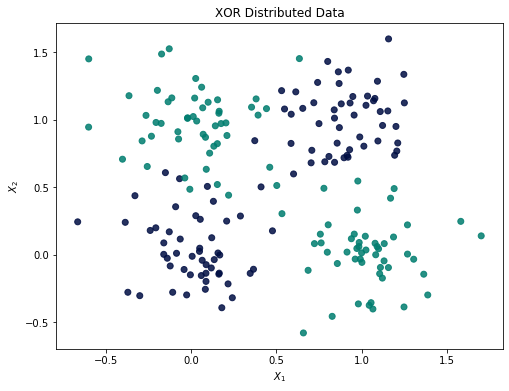

In [122]:
# Plotting the data
plt.figure(figsize = (8, 6))

plt.scatter(X[:, 0], X[:, 1], c = y, cmap = ListedColormap(['#000E43', '#007D6F']), alpha = 0.85)
plt.xlabel('$X_{1}$')
plt.ylabel('$X_{2}$')
plt.title('XOR Distributed Data')

<br>

**Neural Network Architecture**

In [144]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(2, 10)
        self.fc2 = nn.Linear(10, 5)
        self.fc3 = nn.Linear(5,  2)
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = torch.sigmoid(self.fc3(x))
        return x

In [124]:
# Initializing Neural Network
XOR_net = Net()

In [125]:
# Choosing our Loss Function. We could also use nn.MSELoss or nn.BCELoss.
criterion = nn.CrossEntropyLoss()

In [126]:
# Choosing Adam to be our optimizer
optimizer = torch.optim.Adam(XOR_net.parameters(), lr=0.001)

<br>

**Training Neural Network**

In [127]:
# We will divide the data into a training and a test set
X, y = torch.from_numpy(X), torch.from_numpy(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [128]:
X_train.shape, y_train.shape

(torch.Size([160, 2]), torch.Size([160]))

In [145]:
for epoch in tqdm(range(1000)):
    # Set all gradients to zero
    optimizer.zero_grad()
    
    # Propagate the network forward 
    y_hat = XOR_net(X_train.float())
    
    # Get the loss and take a gradient step
    loss = criterion(y_hat, y_train.long())
    loss.backward()
    
    # Print loss
    if epoch % 500 == 0:
        print(loss)
    
    optimizer.step()

tensor(0.3606, grad_fn=<NllLossBackward>)
tensor(0.3606, grad_fn=<NllLossBackward>)



In [130]:
with torch.no_grad():
    # Load model
    XOR_net.eval()
    
    # Propagate the network forward
    y = XOR_net(X_test.float())
    loss = criterion(y, y_test.long())
    
    # Get predictions
    predictions = torch.argmax(y, dim=1)

<br>

**Decision boundary**

In [131]:
# Set up Color Map
cmap_light = ListedColormap(['#BCECFF', '#ABE2E0'])
cmap_strong = ListedColormap(['#000E43', '#007D6F'])

In [132]:
def plot_decision_boundary(model, X):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    h = 0.01
    
    # Generate a grid of points with distance h between them
    xx, yy = torch.meshgrid(torch.arange(x_min, x_max, h), torch.arange(y_min, y_max, h))
    
    # Predict the function value for the whole grid
    X = torch.cat([xx.reshape(-1,1), yy.reshape(-1,1)],dim=1)
    y_hat = model(X)
    Z = y_hat.topk(1,1,True,True)[1]
    Z = Z.view(xx.size())
    
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=cmap_light)

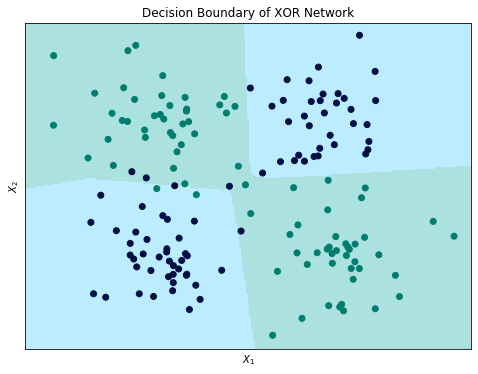

In [133]:
# Plotting decision boundary
plt.figure(figsize = (8, 6))

# Plotting results
plot_decision_boundary(XOR_net, X)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap_strong)
plt.xlabel('$X_{1}$')
plt.ylabel('$X_{2}$')
plt.title('Decision Boundary of XOR Network')

#Removing axis ticks
ax = plt.gca()
ax.axes.xaxis.set_ticks([])
ax.axes.yaxis.set_ticks([])

plt.show()

<br>

**Accuracy Computation**

In [134]:
class style:
    start = '\033[1m'
    end = '\033[0m'

In [135]:
accuracy = torch.sum(predictions == y_test) / torch.Tensor([len(predictions)])
accuracy = accuracy.numpy()[0]*100

In [136]:
print(style.start + 'Accuracy: ' + style.end + f'{accuracy.round(2)}%')

Accuracy: 95.0%


<br>

**Saving the Model**

In [146]:
torch.save(XOR_net, 'XOR_net')

<br>

### Q2: Forward Propagation on Neural Network

Implement a feed-forward neural network function from scratch. Extract the learned weights from Q1 and run the model through your custom implementation. Demonstrate that you get the same results. <br>
Do not train the model yourself. Do not implement backpropagation. Just run it forward using the PyTorch-trained weights.


In [140]:
XOR_net = torch.load('XOR_net')

In [141]:
# @Sebas: The following contains all parameters
X = list(XOR_net.parameters())

In [143]:
# If you want to get the weights you can find them at
X[0], X[2], X[4]

In [ ]:
# The following contain the result of applying Relu or Sigmoid
X[1], X[3], X[5]